In [3]:
#install.packages("transformr")
library(readxl)
library(tidyverse)
library(transformr)
library(gganimate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [16]:
us.data <- read.csv('us-states.csv')
us.data$date <- as.Date(us.data$date)
us.data <- us.data %>%
            arrange(date) %>%
           # mutate(cases = cases + seq.int(nrow(us.data))*0.0000001) %>%
            group_by(state) %>%
            mutate(newcases = cases - lag(cases, 1)) %>%
            mutate(smacases = (newcases + lag(newcases, 1) + lag(newcases, 2))/3 ) 
us.data %>% filter(state=='Kansas')

date,state,fips,cases,deaths,newcases,smacases
<date>,<fct>,<int>,<int>,<int>,<int>,<dbl>
2020-03-07,Kansas,20,1,0,NA,NA
2020-03-08,Kansas,20,1,0,0,NA
2020-03-09,Kansas,20,1,0,0,NA
2020-03-10,Kansas,20,1,0,0,0.000000
2020-03-11,Kansas,20,1,0,0,0.000000
2020-03-12,Kansas,20,5,1,4,1.333333
2020-03-13,Kansas,20,6,1,1,1.666667
2020-03-14,Kansas,20,8,1,2,2.333333
2020-03-15,Kansas,20,9,1,1,1.333333


In [19]:
p <- ggplot(us.data, aes(x=cases)) +
    geom_line(aes(y=smacases, colour=state)) +
#    geom_line(aes(y=deaths, colour=state)) +
    theme(legend.position="none") +
    scale_y_log10(labels = scales::comma) +
    scale_x_log10(labels = scales::comma) +
    labs(x="Cumulative Confirmed Cases", 
         y="New Confirmed Cases (3 day SMA)", 
         title="COVID-19 Confirmed New Cases against Cumulative Cases by US state",
         #subtitle="27th of March 2020",
         caption="Ali Raheem 29/03/2020, data: The New York Times (https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html)") + 
    scale_colour_discrete(name="")

In [54]:
p + transition_time(cases) + labs(subtitle="Cumulative Cases: {frame_time}")

ERROR while rich displaying an object: Error in rep(seq_len(nrow(polygon)), splits + 1): invalid 'times' argument

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.d

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 162 row(s) containing missing values (geom_path).”


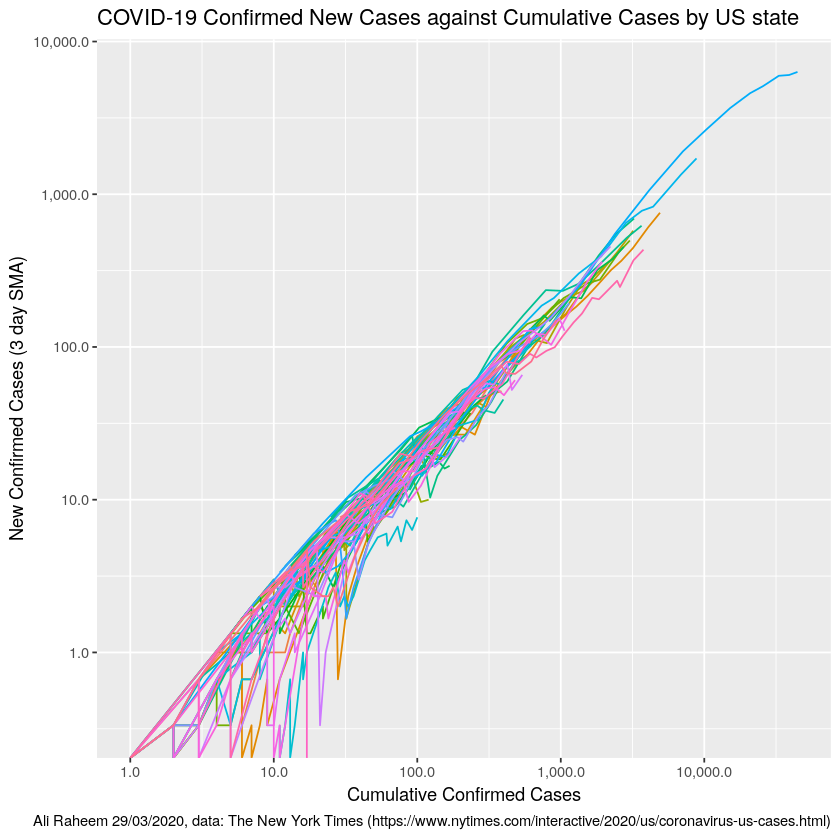

In [20]:
p